In [2]:
from scipy import stats
import numpy as np

In [9]:
import pandas as pd
%matplotlib inline

In [15]:
a = np.random.randn(100)
b = np.random.randn(100)
c = np.random.normal(1,5,100)
d = np.zeros(200)
d[100:]=1

In [20]:
df = pd.DataFrame({'a':np.r_[a,b],'b':d})

In [24]:
df1 = pd.DataFrame({'a':np.r_[a,c],'b':d})

In [25]:
stats.pointbiserialr(df1['a'],df1['b'])

PointbiserialrResult(correlation=0.12982525847914728, pvalue=0.0669126511246321)

In [26]:
stats.pointbiserialr(df['a'],df['b'])

PointbiserialrResult(correlation=-0.09924656608658287, pvalue=0.16204843247389117)

In [ ]:
import pandas as pd
import numpy as np

from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 这是那四个水平的索赔额的观测值
A1 = [1.6, 1.61, 1.65, 1.68, 1.7, 1.7, 1.78]
A2 = [1.5, 1.64, 1.4, 1.7, 1.75]
A3 = [1.6, 1.55, 1.6, 1.62, 1.64, 1.60, 1.74, 1.8]
A4 = [1.51, 1.52, 1.53, 1.57, 1.64, 1.6]

data = [A1, A2, A3, A4]
# 方差的齐性检验
w, p = stats.levene(*data)
if p < 0.05:
    print('方差齐性假设不成立')
''' 因为方差分析的实质是检验多个水平的均值是否有显著差异，如果各个水平的观察值方差差异太大，
只检验均值之间的差异就没有意义了，所以要进行方差齐性检验。'''
# 成立之后， 就可以进行单因素方差分析
f, p = stats.f_oneway(*data)
print(f, p)      #  2.06507381767795 0.13406910483160134
'''我们应该评估检验的假设条件， 就是看看每个数据是不是真的服从正态。
数据是不是服从正态的方法了Shapiro-Wilk test（小样本情况下， 常用的正态检验方法）'''
def normal_judge(data):
    stat, p = shapiro(data)
    if p > 0.05:
        return 'stat={:.3f}, p = {:.3f}, probably gaussian'.format(stat,p)
    else:
        return 'stat={:.3f}, p = {:.3f}, probably not gaussian'.format(
            stat,p)

for d in data:
    print(normal_judge(d))

Text(3.5217650022528986, 0.5, '3.52')

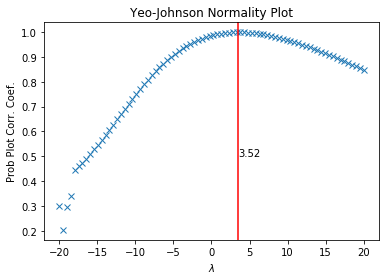

In [22]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
x = stats.loggamma.rvs(5, size=500) + 5
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.yeojohnson_normplot(x, -20, 20, plot=ax)
y, maxlog = stats.yeojohnson(x)
ax.axvline(maxlog, color='r')
ax.text(maxlog,0.5,'{:.2f}'.format(maxlog))

In [7]:
import seaborn as sns

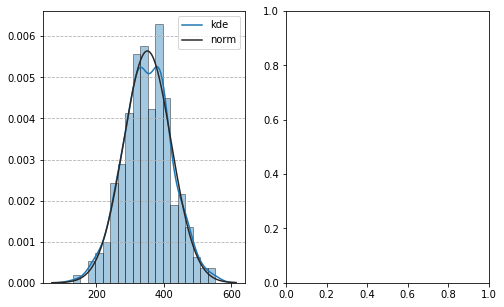

In [45]:
_, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(8,5))
sns.distplot(y, hist_kws={'edgecolor':'k'},fit=stats.norm,
             label=True,ax=ax1)
ax1.legend(ax1.lines, ['kde','norm'])
ax1.grid(axis='y',ls='--')

In [34]:
def normtest(series,method='normaltest'):
    loc, scale = series.mean(), series.std()
    data = (series-loc)/scale
    funcs = {'kstest':partial(stats.kstest,cdf=stats.norm.cdf),
           'anderson':stats.anderson,
           'shapiro':stats.shapiro,
           'jarque':stats.jarque_bera,
           'normaltest':stats.normaltest}
    func = funcs.get(method,-1)
    if func == -1:
        raise ValueError('请输入正确的检验方法')
    return func(data)

In [42]:
import pandas as pd
c = pd.Series(np.random.exponential(3,1000))
normtest(c,'jarques')

ValueError: 请输入正确的检验方法

In [32]:
func = partial(stats.kstest, cdf=stats.norm(10,100).cdf)

In [33]:
stats.anderson()

KstestResult(statistic=0.05411085324603582, pvalue=0.9314647191109614)

In [ ]:
dict.get()